In [122]:
import pandas as pd
import numpy as np

In [123]:
data = pd.read_csv('GOOG.csv')
Date1 = data['Date']
Price_G = data['Open']
vol = data['Volume']
p_500 = data['SP500']
btc = data['BTC']
new_data = []
new_data.append(pd.DataFrame({'Date':Date1,
                              'Google': Price_G,
                              
                              'S&P500': p_500,
                              'BTC': btc
                              }))
new_data_df = pd.concat(new_data)
new_data_df.dropna(inplace=True)
new_data_df.info()
new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])  # Ensure the date column is in datetime format
df = new_data_df.set_index('Date')  # Set the date column as the index of the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 2090 entries, 0 to 2089
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2090 non-null   object 
 1   Google  2090 non-null   float64
 2   S&P500  2090 non-null   float64
 3   BTC     2090 non-null   float64
dtypes: float64(3), object(1)
memory usage: 81.6+ KB


In [124]:
# Agregați datele în time frame-uri săptămânale
df_weekly = df.resample('W').mean()  # puteți utiliza și alte metode de agregare, cum ar fi 'sum', 'max', 'min', etc.
df = df_weekly
df = df.drop(df.index[0])

# Vizualizați DataFrame-ul rezultat cu time frame-uri săptămânale
print(df)

                Google     S&P500         BTC
Date                                         
2015-01-11   25.410336  2035.2400    280.4580
2015-01-18   24.871814  2020.4220    228.6800
2015-01-25   25.870473  2034.5575    221.2825
2015-02-01   26.109716  2030.4840    251.3440
2015-02-08   26.331706  2034.7940    227.2060
2015-02-15   26.658808  2066.0320    220.9160
2015-02-22   27.043253  2098.1325    238.4650
2015-03-01   26.920091  2111.8040    237.5320
2015-03-08   28.449392  2105.6320    273.1480
2015-03-15   27.856121  2059.7480    289.2880
2015-03-22   27.685988  2079.5580    275.6380
2015-03-29   27.964024  2084.1500    255.3580
2015-04-05   27.313386  2068.9550    245.4100
2015-04-12   26.846293  2079.0800    251.4980
2015-04-19   26.546317  2100.1340    226.4540
2015-04-26   26.972048  2101.0420    230.5700
2015-05-03   27.548000  2106.6060    227.1240
2015-05-10   26.686200  2097.2420    236.4640
2015-05-17   26.734800  2108.1100    239.4040
2015-05-24   26.825800  2126.8900 

In [125]:
data_2 = pd.read_csv('WALCL.csv')
Date1_2 = data_2['Date']
Price_2 = data_2['WALCL']
new_data_2 = []
new_data_2.append(pd.DataFrame({'Date':Date1_2,
                              'FED_Balance': Price_2
                              }))
new_data_df_2 = pd.concat(new_data_2)
new_data_df_2.dropna(inplace=True)
new_data_df_2.info()
new_data_df_2['Date'] = pd.to_datetime(new_data_df_2['Date'])  # Ensure the date column is in datetime format
df_2 = new_data_df_2.set_index('Date')  # Set the date column as the index of the DataFrame

# Agregați datele în time frame-uri săptămânale
df_weekly_2 = df_2.resample('W').mean()  # puteți utiliza și alte metode de agregare, cum ar fi 'sum', 'max', 'min', etc.
df_2 = df_weekly_2

# Vizualizați DataFrame-ul rezultat cu time frame-uri săptămânale
print(df_2)

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 436
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         437 non-null    object 
 1   FED_Balance  437 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB
            FED_Balance
Date                   
2015-01-11    4499524.0
2015-01-18    4516077.0
2015-01-25    4512936.0
2015-02-01    4500064.0
2015-02-08    4500348.0
2015-02-15    4501685.0
2015-02-22    4496851.0
2015-03-01    4486725.0
2015-03-08    4487583.0
2015-03-15    4489279.0
2015-03-22    4495888.0
2015-03-29    4480603.0
2015-04-05    4481799.0
2015-04-12    4483419.0
2015-04-19    4485366.0
2015-04-26    4489695.0
2015-05-03    4471499.0
2015-05-10    4472703.0
2015-05-17    4501188.0
2015-05-24    4480384.0
2015-05-31    4463981.0
2015-06-07    4465360.0
2015-06-14    4468005.0
2015-06-21    4487817.0
2015-06-28    4495055.0
2015-07-05    4479130.0
2015-07-

In [126]:
merged_df = df.merge(df_2, on='Date', how='outer')

In [127]:
df = merged_df.dropna()

In [128]:
df = df.astype(int)

In [129]:
from sklearn.preprocessing import StandardScaler

# Crearea obiectului scaler
scaler = StandardScaler()

# Aplicarea scaler-ului la DataFrame
df_scaled = scaler.fit_transform(df)

# Crearea unui nou DataFrame cu datele scalate
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

<Axes: >

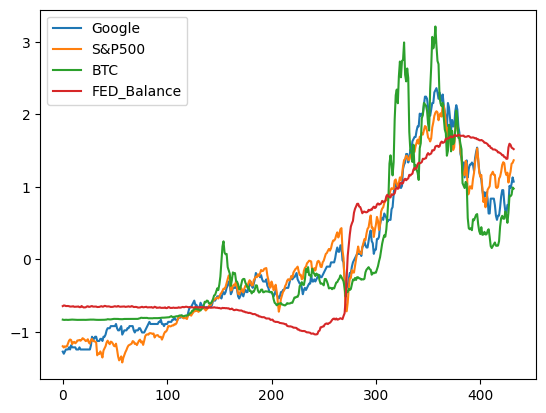

In [130]:
df_scaled.plot()

In [160]:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df_scaled = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df_scaled.columns:
        for r in df_scaled.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df_scaled.loc[r, c] = min_p_value
    df_scaled.columns = [var + '_x' for var in variables]
    df_scaled.index = [var + '_y' for var in variables]
    return df_scaled

grangers_causation_matrix(df_scaled, variables = df_scaled.columns) 

,Google_x,S&P500_x,BTC_x,FED_Balance_x
Google_y,1.0000,0.0094,0.0001,0.0115
S&P500_y,0.0602,1.0000,0.0311,0.0037
BTC_y,0.0000,0.0103,1.0000,0.0003
FED_Balance_y,0.0001,0.0000,0.0102,1.0000


In [131]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, coint

# Încărcăm datele (presupunem că 'df_scaled' este deja definit)
# df_scaled = pd.read_csv('path_to_your_file.csv', index_col='timpul')

# Listă pentru stocarea rezultatelor
results = []

# Verificăm fiecare serie în parte cu testul Augmented Dickey-Fuller
for column in df_scaled.columns:
    result = adfuller(df_scaled[column])
    results.append(result[1])  # adăugăm p-value în listă

# Printăm rezultatele
for variable, p_value in zip(df_scaled.columns, results):
    print(f'ADF test pentru {variable}: p-value = {p_value:.3f}')

# Acum ne ocupăm de cointegrare. Folosim testul Engle-Granger.
for i in range(len(df_scaled.columns)):
    for j in range(i+1, len(df_scaled.columns)):
        score, p_value, _ = coint(df_scaled[df_scaled.columns[i]], df_scaled[df_scaled.columns[j]])
        print(f'Testul Engle-Granger pentru {df_scaled.columns[i]} și {df_scaled.columns[j]}: p-value = {p_value:.3f}')

ADF test pentru Google: p-value = 0.751
ADF test pentru S&P500: p-value = 0.858
ADF test pentru BTC: p-value = 0.600
ADF test pentru FED_Balance: p-value = 0.939
Testul Engle-Granger pentru Google și S&P500: p-value = 0.164
Testul Engle-Granger pentru Google și BTC: p-value = 0.012
Testul Engle-Granger pentru Google și FED_Balance: p-value = 0.405
Testul Engle-Granger pentru S&P500 și BTC: p-value = 0.078
Testul Engle-Granger pentru S&P500 și FED_Balance: p-value = 0.280
Testul Engle-Granger pentru BTC și FED_Balance: p-value = 0.170


In [132]:
# Diferențiere
df_scaled_dif = df_scaled.diff().dropna()

In [133]:
# Listă pentru stocarea rezultatelor
results = []

# Verificăm fiecare serie în parte cu testul Augmented Dickey-Fuller
for column in df_scaled_dif.columns:
    result = adfuller(df_scaled_dif[column])
    results.append(result[1])  # adăugăm p-value în listă

# Printăm rezultatele
for variable, p_value in zip(df_scaled_dif.columns, results):
    print(f'ADF test pentru {variable}: p-value = {p_value:.3f}')

# Acum ne ocupăm de cointegrare. Folosim testul Engle-Granger.
for i in range(len(df_scaled_dif.columns)):
    for j in range(i+1, len(df_scaled_dif.columns)):
        score, p_value, _ = coint(df_scaled_dif[df_scaled_dif.columns[i]], df_scaled_dif[df_scaled_dif.columns[j]])
        print(f'Testul Engle-Granger pentru {df_scaled_dif.columns[i]} și {df_scaled_dif.columns[j]}: p-value = {p_value:.3f}')

ADF test pentru Google: p-value = 0.000
ADF test pentru S&P500: p-value = 0.000
ADF test pentru BTC: p-value = 0.000
ADF test pentru FED_Balance: p-value = 0.000
Testul Engle-Granger pentru Google și S&P500: p-value = 0.005
Testul Engle-Granger pentru Google și BTC: p-value = 0.000
Testul Engle-Granger pentru Google și FED_Balance: p-value = 0.000
Testul Engle-Granger pentru S&P500 și BTC: p-value = 0.000
Testul Engle-Granger pentru S&P500 și FED_Balance: p-value = 0.000
Testul Engle-Granger pentru BTC și FED_Balance: p-value = 0.000


In [161]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df_scaled_dif, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df_scaled_dif,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df_scaled_dif.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_scaled_dif)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Google ::  238.48    > 40.1749   =>   True
S&P500 ::  151.67    > 24.2761   =>   True
BTC    ::  74.22     > 12.3212   =>   True
FED_Balance ::  28.31     > 4.1296    =>   True


In [135]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(df_scaled_dif)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -23.47170561997293
BIC :  -23.28302310999132
FPE :  6.402794698457252e-11
HQIC:  -23.39720750135429 

Lag Order = 2
AIC :  -23.458116746922354
BIC :  -23.11789286898572
FPE :  6.490527024987782e-11
HQIC:  -23.32377241124168 

Lag Order = 3
AIC :  -23.461820443160132
BIC :  -22.96952263480522
FPE :  6.466854508049814e-11
HQIC:  -23.267408276650873 

Lag Order = 4
AIC :  -23.477959473350385
BIC :  -22.833052049753277
FPE :  6.363915362180837e-11
HQIC:  -23.223256543610944 

Lag Order = 5
AIC :  -23.486991202024864
BIC :  -22.68893533057005
FPE :  6.307645627214834e-11
HQIC:  -23.171773247272622 

Lag Order = 6
AIC :  -23.456105259874764
BIC :  -22.504358934459418
FPE :  6.506950047619905e-11
HQIC:  -23.080146678089104 

Lag Order = 7
AIC :  -23.42627407540227
BIC :  -22.32029209047231
FPE :  6.70605964138046e-11
HQIC:  -22.989347913355203 

Lag Order = 8
AIC :  -23.403306641863622
BIC :  -22.1425405661782
FPE :  6.864692153201899e-11
HQIC:  -22.90518458403664 

Lag O

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [136]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-22.57,-22.53,1.583e-10,-22.55
1,-23.38,-23.19*,7.010e-11,-23.31*
2,-23.37,-23.03,7.054e-11,-23.24
3,-23.39,-22.89,6.981e-11,-23.19
4,-23.41,-22.76,6.813e-11,-23.15
5,-23.43,-22.62,6.698e-11,-23.11
6,-23.41,-22.44,6.844e-11,-23.03
7,-23.38,-22.27,6.994e-11,-22.94
8,-23.37,-22.10,7.127e-11,-22.86
9,-23.42,-21.99,6.771e-11,-22.85


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


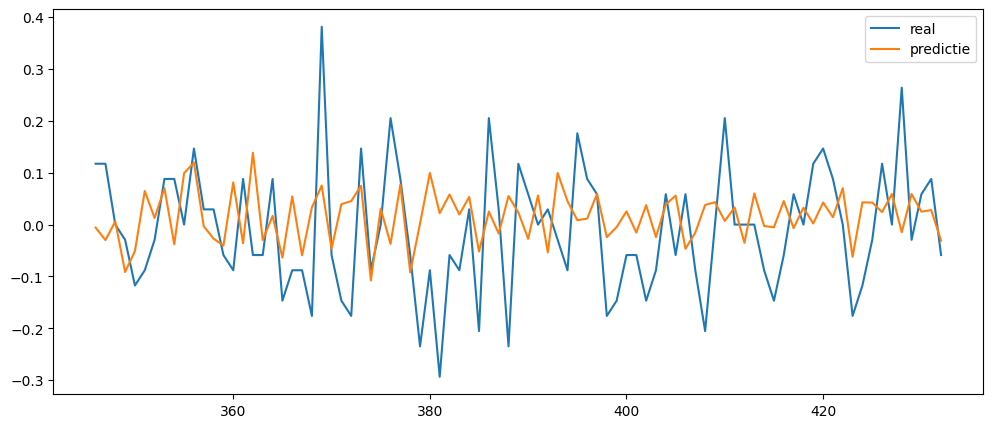

In [137]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Setăm procentul de date pentru instruire
train_ratio = 0.8
nobs = int(df_scaled_dif.shape[0] * train_ratio)

# Impartim setul de date
df_train, df_test = df_scaled_dif[0:nobs], df_scaled_dif[nobs:]

# Antrenăm modelul VAR
model = VAR(df_train)
results = model.fit(maxlags=30, ic='aic')

# Facem predicții
lag_order = results.k_ar
forecast_input = df_scaled_dif.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=df_test.shape[0])

# Transformam predicțiile într-un dataframe pentru a putea face graficul
df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=df_test.columns + '_pred')

# Suprapunem predicțiile pe grafic cu datele reale din setul de testare
plt.figure(figsize=(12, 5))
plt.plot(df_test.index, df_test['Google'], label='real')
plt.plot(df_forecast.index, df_forecast['Google_pred'], label='predictie')
plt.legend()
plt.show()

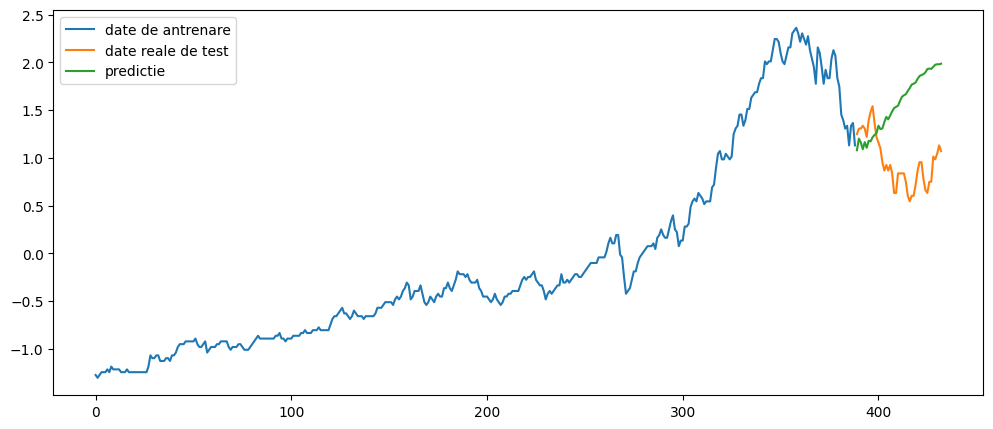

In [138]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df_scaled.shape[0] * train_ratio)

# Impartim setul de date
df_train, df_test = df_scaled[0:nobs], df_scaled[nobs:]

# Antrenăm modelul VAR
model = VAR(df_train)
results = model.fit(maxlags=20, ic='aic')

# Facem predicții
lag_order = results.k_ar
forecast_input = df_scaled.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=df_test.shape[0])

# Transformam predicțiile într-un dataframe pentru a putea face graficul
df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=df_test.columns + '_pred')

# Suprapunem datele de antrenare, predicțiile și datele reale din setul de testare pe grafic
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['Google'], label='date de antrenare')
plt.plot(df_test.index, df_test['Google'], label='date reale de test')
plt.plot(df_forecast.index, df_forecast['Google_pred'], label='predictie')
plt.legend()
plt.show()

In [139]:
print(lag_order)

15


In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculăm eroarea absolută medie (MAE)
mae = mean_absolute_error(df_test['Google'], df_forecast['Google_pred'])
print('MAE: ', mae)

# Calculăm eroarea pătratică medie (MSE)
mse = mean_squared_error(df_test['Google'], df_forecast['Google_pred'])
print('MSE: ', mse)

# Calculăm rădăcina erorii pătratice medii (RMSE)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

MAE:  0.6883467071373264
MSE:  0.6259796643342311
RMSE:  0.7911887665622099


In [141]:
# Setează numărul maxim de rânduri afișate
pd.set_option('display.max_rows', None)
# Setează numărul maxim de coloane afișate
pd.set_option('display.max_columns', None)

# Antrenează modelul VAR
model = VAR(df_train)
results = model.fit(maxlags=20, ic='aic')

# Afișează parametrii modelului
print(results.params)

                   Google    S&P500       BTC  FED_Balance
const           -0.001291 -0.002937  0.001906     0.002195
L1.Google        1.010082 -0.093534  0.427810     0.048991
L1.S&P500        0.113812  1.393308 -0.226955    -0.103189
L1.BTC          -0.020382  0.001591  1.128396    -0.008890
L1.FED_Balance  -0.295109 -0.127607 -1.054888     1.615316
L2.Google       -0.064758  0.087437 -0.630981    -0.026218
L2.S&P500       -0.134983 -0.520282  0.270792     0.051209
L2.BTC           0.070622  0.048879 -0.124938     0.004849
L2.FED_Balance   0.746537  0.494910  1.512392    -0.604329
L3.Google        0.006348  0.080510  0.648014    -0.009919
L3.S&P500       -0.028754  0.026726 -0.514258    -0.003974
L3.BTC          -0.026034 -0.049046 -0.100512     0.006138
L3.FED_Balance  -0.515769 -0.250125 -0.150991    -0.033390
L4.Google       -0.049751 -0.062782 -0.116429     0.033364
L4.S&P500        0.123853  0.094985  0.270003    -0.001644
L4.BTC           0.058623  0.063162  0.193420    -0.0085

In [142]:
# Afișăm un rezumat al modelului
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 01, Jun, 2023
Time:                     11:36:39
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -21.4816
Nobs:                     374.000    HQIC:                  -23.0253
Log likelihood:           2617.08    FPE:                3.66350e-11
AIC:                     -24.0418    Det(Omega_mle):     2.00182e-11
--------------------------------------------------------------------
Results for equation Google
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.001291         0.004557           -0.283           0.777
L1.Google               1.010082         0.088496           11.414           0.000
L1.S&P500               0.113812         0.085979  

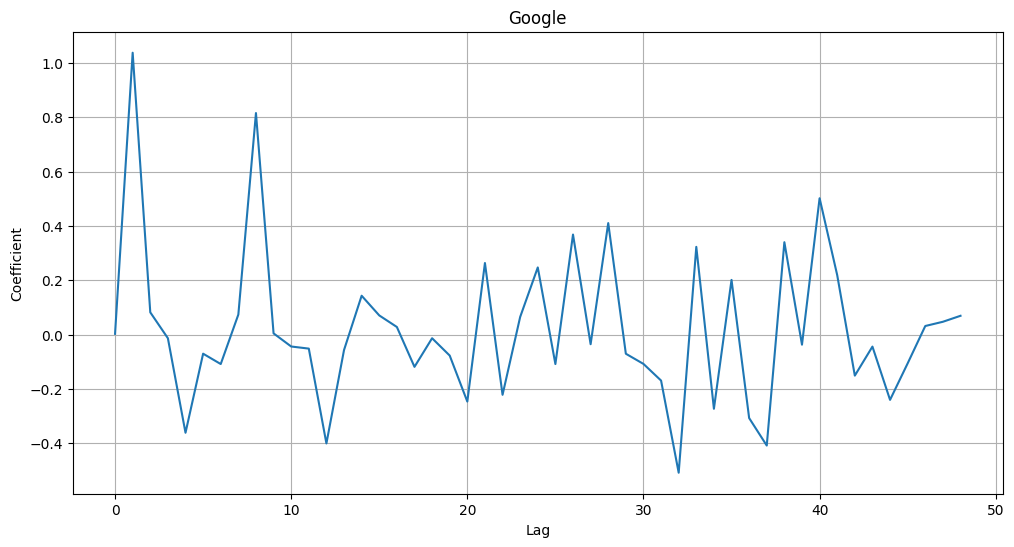

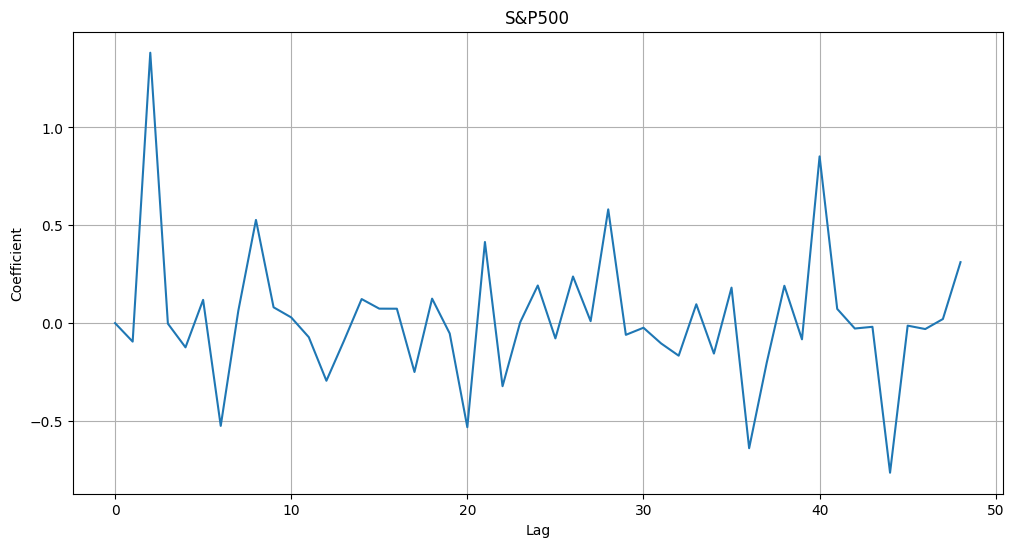

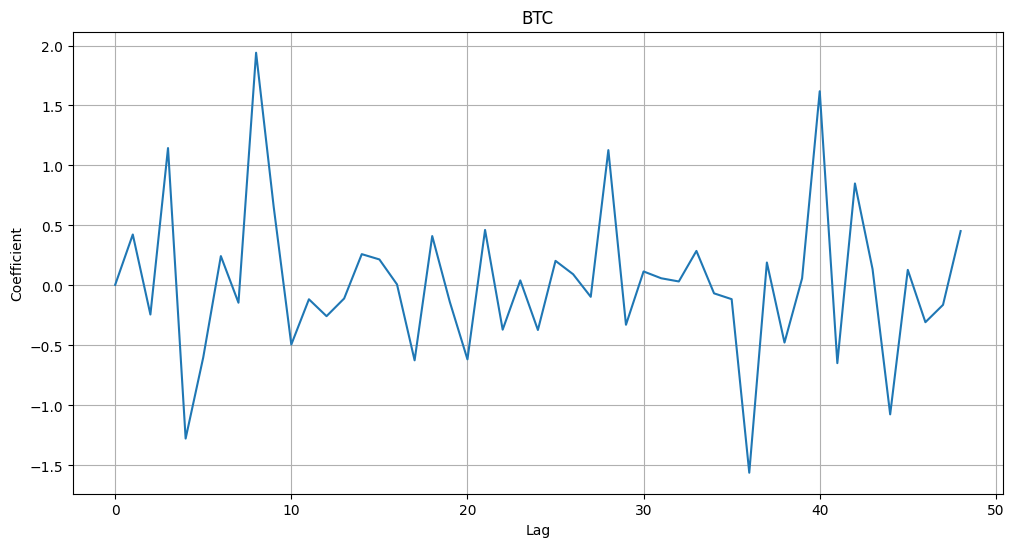

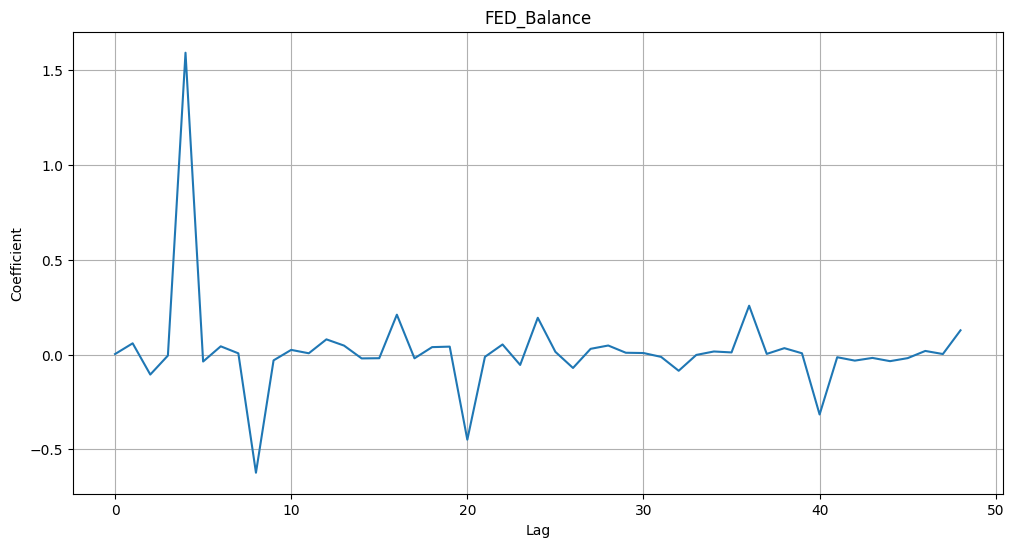

In [143]:
import matplotlib.pyplot as plt

# Antrenăm modelul VAR
model = VAR(df_train)
results = model.fit(maxlags=12, ic='aic')

# Obținem numărul de variabile și de întârzieri
n_vars = results.params.shape[1]
n_lags = results.params.shape[0]

# Pentru fiecare variabilă...
for i in range(n_vars):
    # ...extragem coeficienții pentru fiecare întârziere...
    coeffs = results.params.iloc[:, i]
    
    # ...și îi reprezentăm într-un grafic.
    plt.figure(figsize=(12, 6))
    plt.plot(range(n_lags), coeffs)
    plt.title(results.params.columns[i])
    plt.xlabel('Lag')
    plt.ylabel('Coefficient')
    plt.grid(True)
    plt.show()

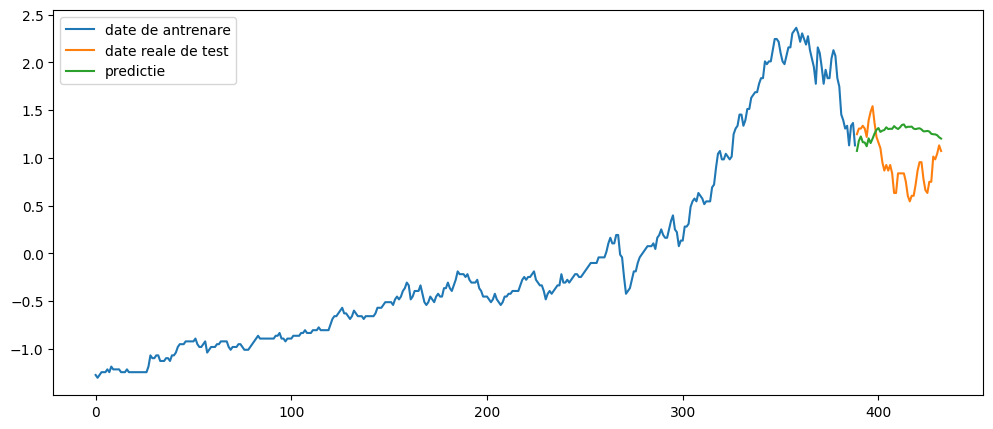

In [145]:
# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df_scaled.shape[0] * train_ratio)

# Selectăm doar coloanele 'Google' și 'Price' din dataframe
df_scaled_selected = df_scaled[['Google', 'FED_Balance']]

# Impartim setul de date
df_train, df_test = df_scaled_selected[0:nobs], df_scaled_selected[nobs:]

# Antrenăm modelul VAR
model = VAR(df_train)
results = model.fit(maxlags=20, ic='aic')

# Facem predicții
lag_order = results.k_ar
forecast_input = df_scaled_selected.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=df_test.shape[0])

# Transformam predicțiile într-un dataframe pentru a putea face graficul
# Numim coloanele cu "_pred" pentru a le deosebi de datele reale
df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=[col + '_pred' for col in df_test.columns])

# Suprapunem datele de antrenare, predicțiile și datele reale din setul de testare pe grafic
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['Google'], label='date de antrenare')
plt.plot(df_test.index, df_test['Google'], label='date reale de test')
plt.plot(df_forecast.index, df_forecast['Google_pred'], label='predictie')
plt.legend()
plt.show()

In [146]:
print(lag_order)

16


In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculăm eroarea absolută medie (MAE)
mae = mean_absolute_error(df_test['Google'], df_forecast['Google_pred'])
print('MAE: ', mae)

# Calculăm eroarea pătratică medie (MSE)
mse = mean_squared_error(df_test['Google'], df_forecast['Google_pred'])
print('MSE: ', mse)

# Calculăm rădăcina erorii pătratice medii (RMSE)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

MAE:  0.3834491740032407
MSE:  0.19057368393893756
RMSE:  0.43654745897661296


In [148]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def determine_coint_rank(df_scaled, p=0):
    """
    Functia determina rangul de cointegrare pentru datele de intrare
    """
    nobs, neqs = df_scaled.shape
    jres = coint_johansen(df_scaled, det_order=p, k_ar_diff=12)
    tr_stat = jres.lr1                        # Trace statistic
    tr_crit_vals = jres.cvt                   # Critical values (90%, 95%, 99%) of trace statistic
    coint_rank = np.sum(tr_stat > tr_crit_vals[:, 1])  # Numarul de valori peste limita de 5%
    return coint_rank

# Alegem rangul de cointegrare pentru datele noastre
coint_rank = determine_coint_rank(df_train)
print("Cointegration rank is", coint_rank)

Cointegration rank is 0


În acest cod, funcția determine_coint_rank() execută testul Johansen pe setul de date de intrare și determină rangul de cointegrare ca numărul de valori ale statisticilor trace care sunt mai mari decât valorile critice de 5%. Apoi aplicăm această funcție pe setul de date de instruire pentru a obține rangul de cointegrare optim.

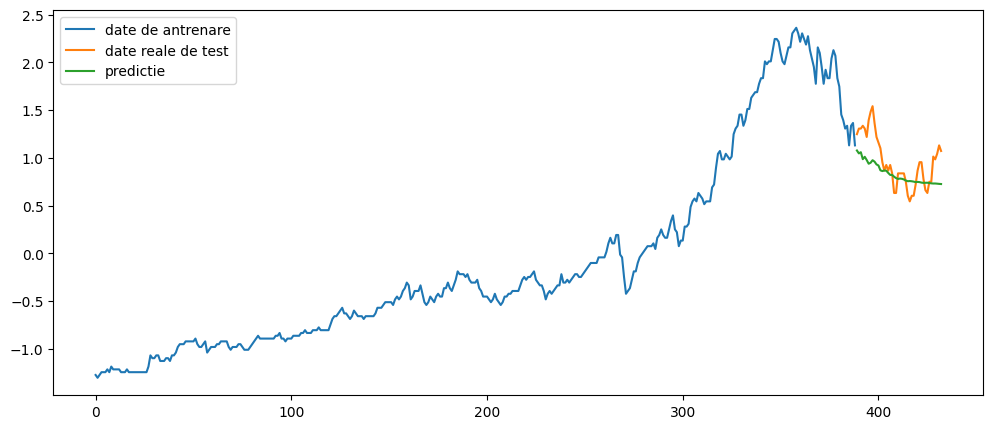

In [150]:
from statsmodels.tsa.vector_ar.vecm import VECM

# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df.shape[0] * train_ratio)

# Impartim setul de date
df_train, df_test = df_scaled[0:nobs], df_scaled[nobs:]

# Antrenăm modelul VECM
vecm = VECM(df_train, k_ar_diff=10, coint_rank=1)
vecm_fit = vecm.fit()

# Facem predicții
forecast = vecm_fit.predict(steps=len(df_test))

# Transformam predicțiile într-un dataframe pentru a putea face graficul
df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=df_test.columns)

# Suprapunem datele de antrenare, predicțiile și datele reale din setul de testare pe grafic
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['Google'], label='date de antrenare')
plt.plot(df_test.index, df_test['Google'], label='date reale de test')
plt.plot(df_forecast.index, df_forecast['Google'], label='predictie')
plt.legend()
plt.show()

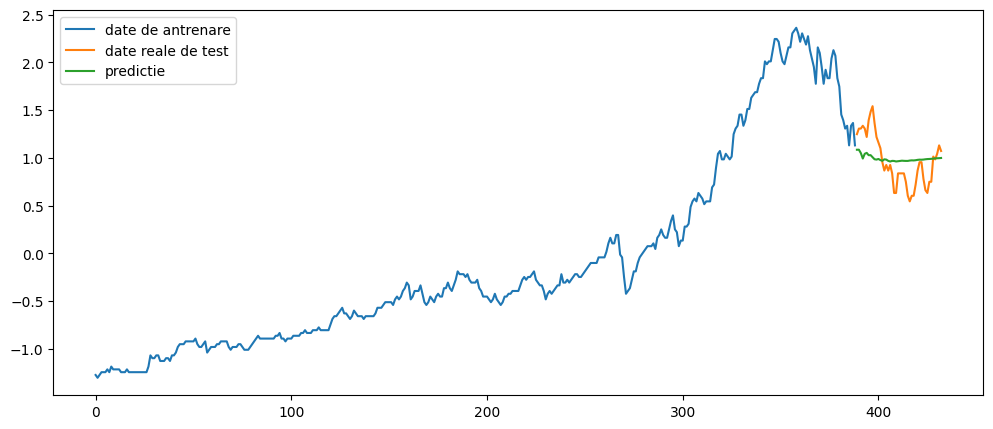

In [151]:
from statsmodels.tsa.vector_ar.vecm import VECM
import numpy as np

# Selectăm doar coloanele 'Google' și 'Price' din dataframe
df_scaled_selected = df_scaled[['Google', 'FED_Balance']]

# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df_scaled_selected.shape[0] * train_ratio)

# Impartim setul de date
df_train, df_test = df_scaled_selected[0:nobs], df_scaled_selected[nobs:]


# Antrenăm modelul VECM cu cea mai bună întârziere
vecm = VECM(df_train, k_ar_diff=10, coint_rank=1)
vecm_fit = vecm.fit()

# Facem predicții
forecast = vecm_fit.predict(steps=len(df_test))

# Transformam predicțiile într-un dataframe pentru a putea face graficul
df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=[col + '_pred' for col in df_test.columns])

# Suprapunem datele de antrenare, predicțiile și datele reale din setul de testare pe grafic
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['Google'], label='date de antrenare')
plt.plot(df_test.index, df_test['Google'], label='date reale de test')
plt.plot(df_forecast.index, df_forecast['Google_pred'], label='predictie')
plt.legend()
plt.show()

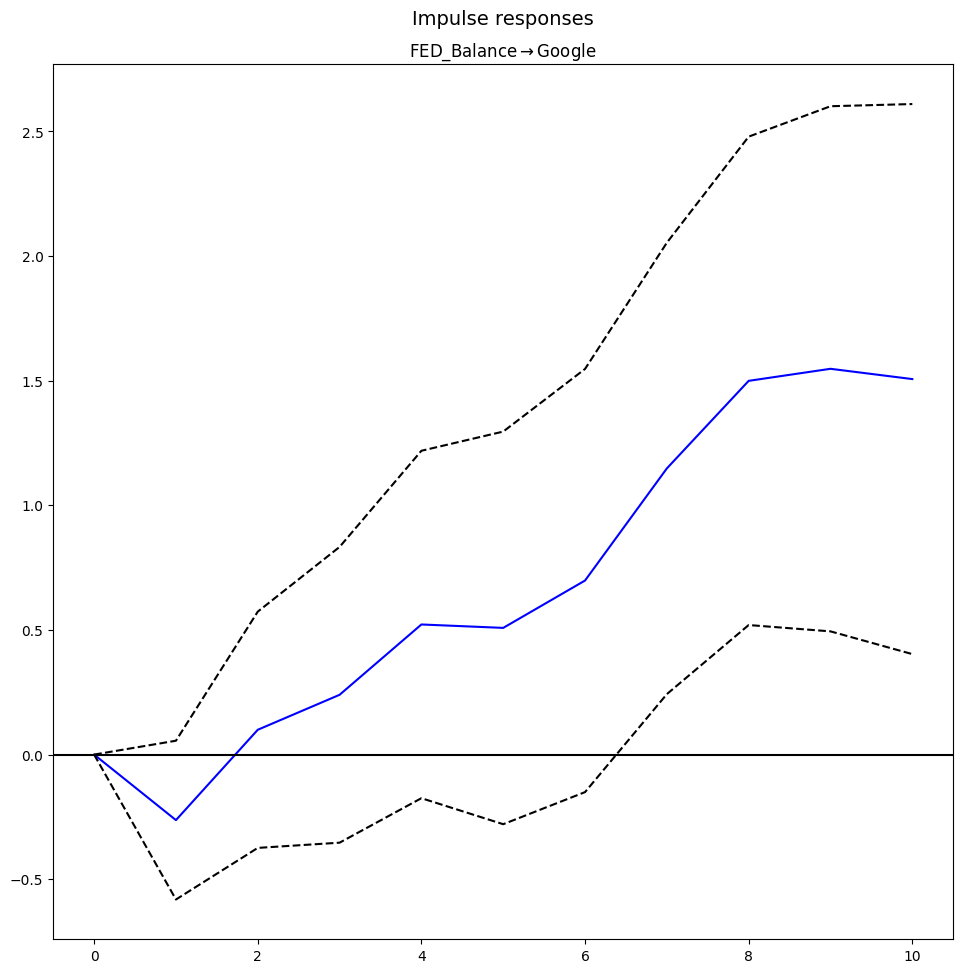

In [153]:
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.irf import IRAnalysis

# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df_scaled.shape[0] * train_ratio)

# Selectăm doar coloanele 'Google' și 'Price' din dataframe
df_selected = df_scaled[['Google', 'FED_Balance']]

# Impartim setul de date
df_train, df_test = df_selected[0:nobs], df_selected[nobs:]

# Antrenăm modelul VECM
model = VECM(df_train, k_ar_diff=10, coint_rank=1)
vecm_fit = model.fit()

# Calculăm funcția de impuls la răspuns
irf = vecm_fit.irf()

# Plotează funcția de impuls la răspuns pentru variabila 'Price' în funcție de 'Google'
irf.plot(impulse='FED_Balance', response='Google', signif=0.05)

# Afișează graficul
plt.show()

In [155]:
import numpy as np
from statsmodels.tsa.vector_ar.vecm import VECM

# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df_scaled.shape[0] * train_ratio)

# Selectăm doar coloanele 'Google' și 'Price' din dataframe
df_selected = df_scaled

# Impartim setul de date
df_train, df_test = df_selected[0:nobs], df_selected[nobs:]

# Antrenăm modelul VECM
model = VECM(df_train, k_ar_diff=20, coint_rank=1)
vecm_fit = model.fit()

# Obținem reziduurile modelului VECM
residuals = vecm_fit.resid

# Calculăm matricea de covarianță a reziduurilor
cov_matrix = np.cov(residuals, rowvar=False)

# Calculăm varianța totală a fiecărei variabile
total_var = np.diag(cov_matrix)

# Calculăm contribuția fiecărei variabile la variația totală
var_contribution = total_var / np.sum(total_var)

# Afișăm rezultatele
print("Contribuția fiecărei variabile la variația totală:")
for i, var_name in enumerate(df_selected.columns):
    print(f"{var_name}: {var_contribution[i]}")

Contribuția fiecărei variabile la variația totală:
Google: 0.19254800241902137
S&P500: 0.22575085632065606
BTC: 0.5647207877910554
FED_Balance: 0.016980353469267236
